In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data = np.loadtxt('FFssFF.N.SGL.360K.Ramp.dat')

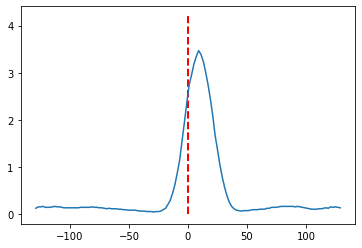

In [295]:
df = pd.read_csv('FFssFF.N.SGL.360K.Ramp.dat',delim_whitespace=True, names=['z','count'])
#df = pd.read_csv('FFssFF.N.SGL.340K.Ramp.dat',delim_whitespace=True, names=['z','count'])
#df = pd.read_csv('FFssFF.N.SGL.340K.dat',delim_whitespace=True, names=['z','count'])
#df = pd.read_csv('FFssFF.N.SGL.310K.dat',delim_whitespace=True, names=['z','count'])
#df = pd.read_csv('FFssFF.N.SGL.294K.dat',delim_whitespace=True, names=['z','count'])
#df = pd.read_csv('FFssFF.N.SGL.326K.dat',delim_whitespace=True, names=['z','count'])


plt.plot(df['z'], df['count'])
plt.vlines(x= 0, ymin= 0.0, ymax= 4.2, color='red', linestyle ='dashed', linewidth = 2)

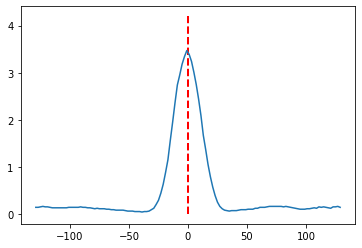

In [296]:
zmod=df['z'].iloc[::]
cmod=df['count'].iloc[::]
cmod2 = np.roll(cmod, -5)
plt.plot(zmod, cmod2)
plt.vlines(x= 0, ymin= 0.0, ymax=4.2, color='red', linestyle ='dashed', linewidth = 2)

In [297]:
# convert into array
zmod2= zmod.to_numpy()
## save csv file from array
dd = pd.DataFrame({"z" : zmod2, "density" : cmod2})
dd.to_csv("FFssFF.mix.360K.ramp.mod.csv", index=False)

# symmetry operation

In [298]:
#symmetry operation
import pandas as pd
import numpy as np
data= np.genfromtxt('FFssFF.mix.360K.ramp.mod.csv', delimiter=',', skip_header=1)

#  FFssFF.mix.310K.mod.csv
# FFssFF.mix.340K.Ramped.mod.csv


#data = np.loadtxt('FFssFF.mix.294K.mod.csv', )
x = data[:,0]
y = data[:,1]
top =[]
bottom = []
mid =int(len(x)/2)
for i in range(mid,0,-1):
    top.append(y[i])
for i in range(mid,int(len(x))):
    bottom.append(y[i])
ans = (np.array(top) + np.array(bottom))/2

xbottom = []
for j in range(mid, int(len(x))):
    xbottom.append(x[j])
zaxis = np.array(xbottom)

file = np.stack((zaxis, ans), axis=1)
np.savetxt('avg.N.SGL.360K.ramp.tt.dat',file, fmt='%.2f', delimiter=' ')

# Fitting_symmetry_graph

[ 3.76339976  0.01738167  9.50161601 15.63607938]


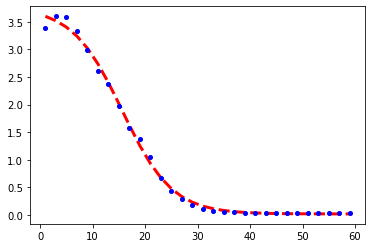

In [213]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
data = genfromtxt('avg.N.SGL.294K.tt.dat', delimiter=' ')
def func(x,a, b,w,z):
    # return 1- np.exp(-(k*x)**n)
    return ((a+b)/2) - ((a-b)/2)*np.tanh((x-z)/w)

xdata = data[:,0]
ydata = data[:,1]
xdata_cut = []
ydata_cut = []
for i in range(len(xdata)):
    if xdata[i] < 60:
        xdata_cut.append(xdata[i])
        ydata_cut.append(ydata[i])

popt, pcov = curve_fit(func, xdata_cut, ydata_cut,p0=np.asarray([1,0.003,0.9,17.4]))
print(popt)
plt.plot(xdata_cut, func(xdata_cut, *popt), 'r--',linewidth=3)
# plt.plot(xdata_cut,ydata_cut,'o',color='blue',label=r'T=0.65,$\rho$=%0.5f,R=%0.2f,w=%0.2f'%(popt[0],popt[3],popt[2]))
plt.plot(xdata_cut,ydata_cut,'o',markersize=4,color='blue',label=r'T=0.65')


In [303]:
ydata_cut

[3.39,
 3.6,
 3.59,
 3.34,
 2.98,
 2.6,
 2.38,
 1.97,
 1.58,
 1.38,
 1.05,
 0.67,
 0.43,
 0.29,
 0.18,
 0.11,
 0.07,
 0.06,
 0.05,
 0.04,
 0.04,
 0.04,
 0.03,
 0.03,
 0.03,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04]

In [299]:
df = pd.DataFrame({"z" : xdata_cut, "p(z)" : pz_tolist, "raw_p(z)": ydata_cut})
df.to_csv("fitting.FFssFF.N.294K.fitting.csv", index=False, float_format='%.3f')

NameError: name 'pz_tolist' is not defined